<a href="https://colab.research.google.com/github/Anant-mishra1729/Machine-Learning-Notebooks/blob/main/Regression/Multioutput_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading the dataset and unzipping the file

In [1]:
import urllib.request
from zipfile import ZipFile

# Downloading data
urllib.request.urlretrieve("https://archive.ics.uci.edu/static/public/242/energy+efficiency.zip", "data.zip")

# Unzipping data.zip
with ZipFile("data.zip", 'r') as zipref:
  zipref.extractall('.')

## Reading dataset

In [2]:
import pandas as pd
df = pd.read_excel('ENB2012_data.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Exploratory data analysis

<Axes: >

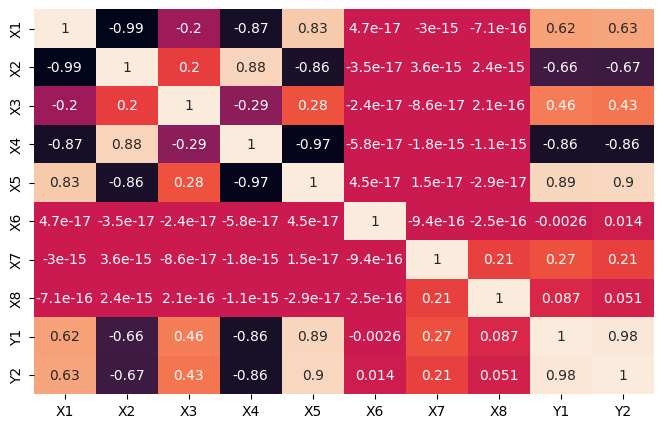

In [3]:
# Finding correlation between features and plotting them
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), cbar = False, annot = True)

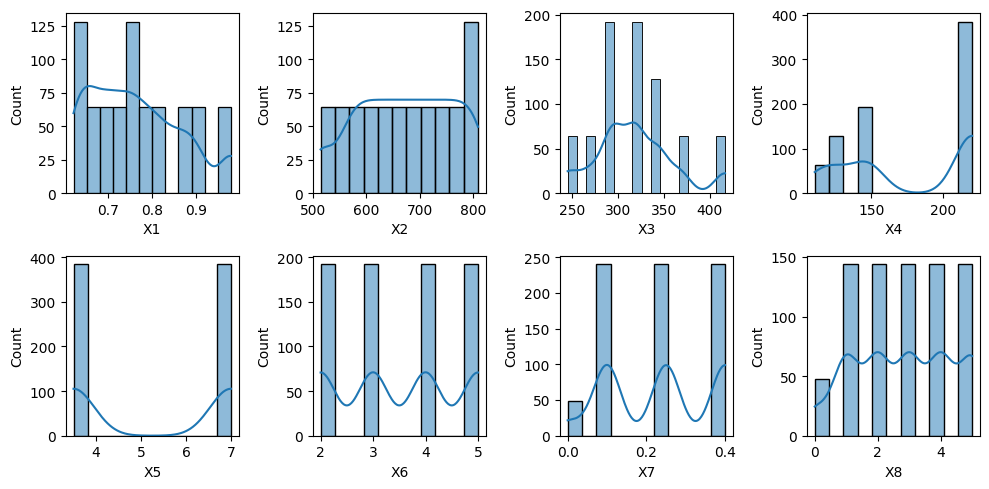

In [4]:
import matplotlib.pyplot as plt

# Define the number of rows and columns you want
n_rows=2
n_cols=4

# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
for i, column in enumerate(df.iloc[:,:-2].columns):
    sns.histplot(df[column],ax=axes[i//n_cols,i%n_cols], kde= True)
plt.tight_layout()

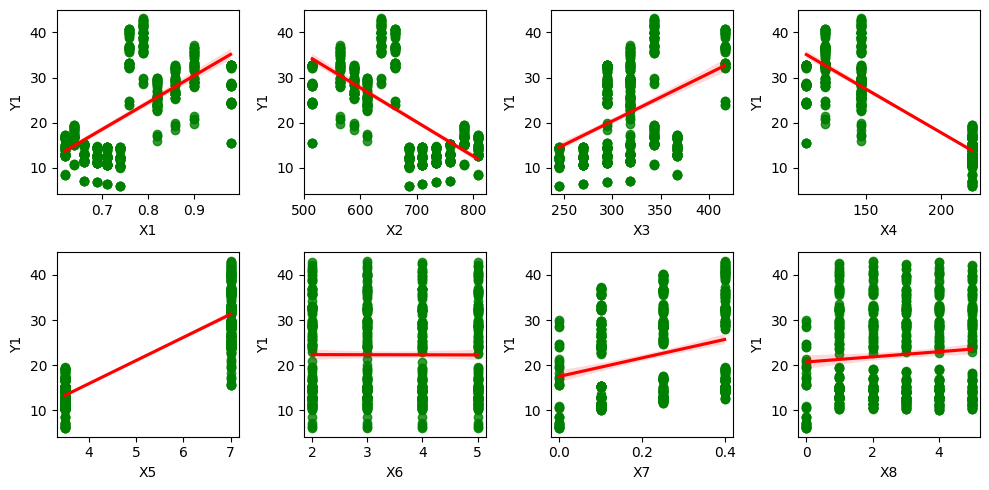

In [5]:
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
for i, column in enumerate(df.iloc[:,:-2].columns):
    sns.regplot(x = df[column], y = df['Y1'],ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.tight_layout()

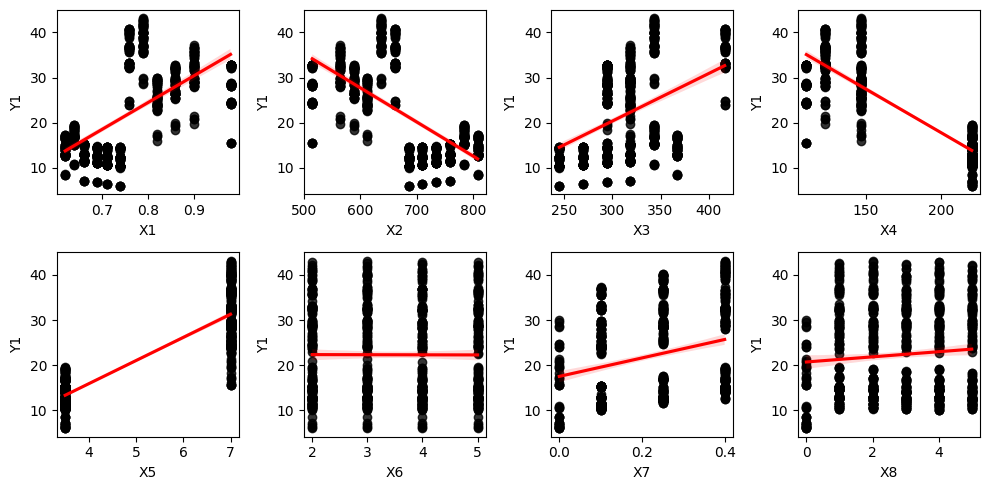

In [6]:
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
for i, column in enumerate(df.iloc[:,:-2].columns):
    sns.regplot(x = df[column], y = df['Y1'],ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.tight_layout()

## Splitting data into train and test data

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-2], df.iloc[:,-2:], test_size = 0.2, random_state = 42)

In [8]:
X_train.shape,X_test.shape

((614, 8), (154, 8))

In [9]:
y_train.shape, y_test.shape

((614, 2), (154, 2))

## Creating Multioutput regressor

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

def printPredictions(y_true,y_pred, count):
  print(f"Predictions: ")
  print(y_true.assign(
      Y1_pred = y_pred[:,0],
      Y2_pred = y_pred[:,1]
  ).head(count).to_markdown(index = False))

def showResults(y_true, y_pred, count = 5):
  print("R2 score: ",r2_score(y_true,y_pred))
  print("Mean squared error: ",mean_squared_error(y_true,y_pred))
  print("Mean absolute error: ",mean_absolute_error(y_true,y_pred))
  printPredictions(y_true,y_pred, count)


In [11]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train,y_train)
showResults(y_test,linear.predict(X_test))

R2 score:  0.9028145634342284
Mean squared error:  9.51221811381318
Mean absolute error:  2.187258158162318
Predictions: 
|    Y1 |    Y2 |   Y1_pred |   Y2_pred |
|------:|------:|----------:|----------:|
| 16.47 | 16.9  |   18.8418 |   19.7585 |
| 13.17 | 16.39 |   14.0391 |   16.7736 |
| 32.82 | 32.78 |   31.3253 |   32.0241 |
| 41.32 | 46.23 |   35.9226 |   36.7056 |
| 16.69 | 19.76 |   15.3271 |   17.2817 |


In [12]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor()
rdf.fit(X_train,y_train)
showResults(y_test,rdf.predict(X_test))

R2 score:  0.9805303754538955
Mean squared error:  1.8172616443831169
Mean absolute error:  0.7434055194805193
Predictions: 
|    Y1 |    Y2 |   Y1_pred |   Y2_pred |
|------:|------:|----------:|----------:|
| 16.47 | 16.9  |   15.6063 |   17.115  |
| 13.17 | 16.39 |   13.1089 |   16.0703 |
| 32.82 | 32.78 |   32.6428 |   33.2961 |
| 41.32 | 46.23 |   41.7367 |   43.1301 |
| 16.69 | 19.76 |   16.8332 |   19.8924 |


In [13]:
from sklearn.ensemble import ExtraTreesRegressor
extra_reg = ExtraTreesRegressor()
extra_reg.fit(X_train,y_train)
showResults(y_test,extra_reg.predict(X_test))

R2 score:  0.9823169727776144
Mean squared error:  1.650640740876624
Mean absolute error:  0.6826594155844149
Predictions: 
|    Y1 |    Y2 |   Y1_pred |   Y2_pred |
|------:|------:|----------:|----------:|
| 16.47 | 16.9  |   15.405  |   17.185  |
| 13.17 | 16.39 |   13.1475 |   16.175  |
| 32.82 | 32.78 |   32.8377 |   32.9541 |
| 41.32 | 46.23 |   41.8644 |   43.1668 |
| 16.69 | 19.76 |   16.7341 |   20.0856 |


In [14]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
showResults(y_test,knn.predict(X_test))

R2 score:  0.9552345708141144
Mean squared error:  4.417399493506494
Mean absolute error:  1.5228636363636365
Predictions: 
|    Y1 |    Y2 |   Y1_pred |   Y2_pred |
|------:|------:|----------:|----------:|
| 16.47 | 16.9  |    14.408 |    15.384 |
| 13.17 | 16.39 |    13.65  |    16.602 |
| 32.82 | 32.78 |    30.262 |    30.852 |
| 41.32 | 46.23 |    40.496 |    44.61  |
| 16.69 | 19.76 |    16.946 |    20.164 |


In [15]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

svm_multi = MultiOutputRegressor(SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1))
svm_multi.fit(X_train,y_train)
showResults(y_test,svm_multi.predict(X_test))

R2 score:  0.9876712414729131
Mean squared error:  1.1737865734622686
Mean absolute error:  0.64545622613329
Predictions: 
|    Y1 |    Y2 |   Y1_pred |   Y2_pred |
|------:|------:|----------:|----------:|
| 16.47 | 16.9  |   15.4987 |   16.426  |
| 13.17 | 16.39 |   12.9448 |   16.4907 |
| 32.82 | 32.78 |   32.2836 |   32.5228 |
| 41.32 | 46.23 |   41.6524 |   44.4467 |
| 16.69 | 19.76 |   17.0211 |   20.1875 |


In [16]:
from sklearn.multioutput import RegressorChain

# define the chained multioutput wrapper model
svm_chain = RegressorChain(SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1))

svm_chain.fit(X_train,y_train)
showResults(y_test,svm_chain.predict(X_test))

R2 score:  0.9770183076559664
Mean squared error:  2.160857985360773
Mean absolute error:  0.8648991134909931
Predictions: 
|    Y1 |    Y2 |   Y1_pred |   Y2_pred |
|------:|------:|----------:|----------:|
| 16.47 | 16.9  |   15.4987 |   17.0196 |
| 13.17 | 16.39 |   12.9448 |   16.1628 |
| 32.82 | 32.78 |   32.2836 |   33.2849 |
| 41.32 | 46.23 |   41.6524 |   43.2883 |
| 16.69 | 19.76 |   17.0211 |   19.9793 |
